In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import st_remux as st

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



%matplotlib inline

Using TensorFlow backend.
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/trial_env/l

In [2]:
# Config
# highpath = 'datasets/high.csv'
# lowpath = 'datasets/none.csv'
# hi = st.raw_to_arr(high, fs, win_len, 0)
# lo = st.raw_to_arr(low, fs, win_len, 0)
class_0_dir = '1D_5class_data/0_all_parameters.csv'
class_1_dir = '1D_5class_data/1_all_parameters.csv'
class_2_dir = '1D_5class_data/2_all_parameters.csv'
class_3_dir = '1D_5class_data/3_all_parameters.csv'
class_4_dir= '1D_5class_data/4_all_parameters.csv'



fs = 4000
win_len = 40

use_filter = 0   # weird results if we use python filtering

use_matlab_backend = 0


class_0= np.genfromtxt(class_0_dir, delimiter=',')
class_1= np.genfromtxt(class_1_dir, delimiter=',')
class_2= np.genfromtxt(class_2_dir, delimiter=',')
class_3= np.genfromtxt(class_3_dir, delimiter=',')
class_4= np.genfromtxt(class_4_dir, delimiter=',')

In [3]:
X = np.concatenate((class_0, class_1, class_2, class_3, class_4))
d= X.shape,
print(d)

((1521, 4),)


In [4]:

class_4_Y = np.ones(len(class_4), dtype=int) * 4
class_3_Y = np.ones(len(class_3), dtype=int) * 3
class_2_Y = np.ones(len(class_2), dtype=int) * 2
class_1_Y = np.ones(len(class_1), dtype=int) * 1
class_0_Y = np.zeros(len(class_0), dtype=int)

Y = np.concatenate((class_0_Y, class_1_Y, class_2_Y, class_3_Y, class_4_Y))

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1)

In [6]:
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (1368, 4) (1368,)
Testing data shape:  (153, 4) (153,)


In [7]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  5
Output classes:  [0 1 2 3 4]


Text(0.5,1,'Ground Truth: 1')

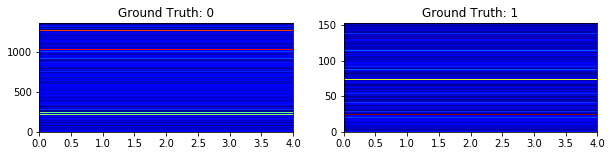

In [8]:
plt.figure(figsize=[10,2])

# Display first image in training set
plt.subplot(121)
plt.pcolormesh(train_X[:,:], cmap='jet')
plt.title("Ground Truth: {}".format(train_Y[0]))

# Display second image in testing set
plt.subplot(122)
plt.pcolormesh(test_X[:], cmap='jet')
plt.title("Ground Truth: {}".format(test_Y[1]))

In [9]:
ydim = train_X[0].shape[0]
print(ydim)
train_X = train_X.reshape(-1, ydim, 1)
test_X = test_X.reshape(-1, ydim, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

4


In [10]:
train_X.shape, test_X.shape
print(train_X)

[[[130.70726 ]
  [130.70726 ]
  [130.70726 ]
  [130.70726 ]]

 [[ 63.13146 ]
  [ 63.13146 ]
  [ 63.13146 ]
  [ 63.13146 ]]

 [[ 80.641464]
  [ 80.641464]
  [ 80.641464]
  [ 80.641464]]

 ...

 [[ 34.177074]
  [ 34.177074]
  [ 34.177074]
  [ 34.177074]]

 [[ 69.239265]
  [ 69.239265]
  [ 69.239265]
  [ 69.239265]]

 [[ 41.04357 ]
  [ 41.04357 ]
  [ 41.04357 ]
  [ 41.04357 ]]]


In [11]:
# Change labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# See the difference?
print('Original label: ', train_Y[0])
print('After conversion to one-hot: ', train_Y_one_hot[0])

Original label:  0
After conversion to one-hot:  [1. 0. 0. 0. 0.]


In [12]:
train_Y_one_hot.shape

(1368, 5)

In [13]:
# Partition data for 80% training and 20% validation
# should reduce overfitting and boost test performance

"""train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape"""

'train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2)\n\ntrain_X.shape, valid_X.shape, train_label.shape, valid_label.shape'

In [14]:
# let's get down to business
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [15]:
batch_size = 16
epochs = 50
num_classes = nClasses

In [16]:
emg_model = Sequential()

emg_model.add(
    Conv1D(
        32, 
        kernel_size=3, 
        activation='linear', 
        input_shape=(ydim,1), 
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling1D(pool_size=2, padding='same'))
emg_model.add(Dropout(0.25))
emg_model.add(
    Conv1D(
        64,
        3,
        activation='linear',
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling1D(pool_size=2, padding='same'))
emg_model.add(Dropout(0.25))
emg_model.add(
    Conv1D(
        128,
        3,
        activation='linear',
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling1D(pool_size=2, padding='same'))
emg_model.add(Dropout(0.4))
emg_model.add(Flatten())
emg_model.add(Dense(128, activation='linear'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(Dropout(0.3))
emg_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
emg_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

In [18]:
emg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 32)             128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 32)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 64)             6208      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)            

In [19]:
emg_train = emg_model.fit(
    train_X,
    train_Y_one_hot,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_X, test_Y_one_hot))

Instructions for updating:
Use tf.cast instead.
Train on 1368 samples, validate on 153 samples
Epoch 1/50
1368/1368 [==============================] - 2s 2ms/step - loss: 2.4508 - accuracy: 0.2317 - val_loss: 1.5418 - val_accuracy: 0.2222
Epoch 2/50
1368/1368 [==============================] - 1s 468us/step - loss: 1.5584 - accuracy: 0.2880 - val_loss: 1.5209 - val_accuracy: 0.2092
Epoch 3/50
1368/1368 [==============================] - 1s 473us/step - loss: 1.5123 - accuracy: 0.2953 - val_loss: 1.5163 - val_accuracy: 0.3987
Epoch 4/50
1368/1368 [==============================] - 1s 613us/step - loss: 1.4802 - accuracy: 0.3048 - val_loss: 1.4787 - val_accuracy: 0.3399
Epoch 5/50
1368/1368 [==============================] - 1s 477us/step - loss: 1.4432 - accuracy: 0.3187 - val_loss: 1.4977 - val_accuracy: 0.3856
Epoch 6/50
1368/1368 [==============================] - 1s 470us/step - loss: 1.4312 - accuracy: 0.3202 - val_loss: 1.4540 - val_accuracy: 0.4052
Epoch 7/50
1368/1368 [=========

In [20]:
test_eval = emg_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [21]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  1.0550522484810523
Test accuracy:  0.529411792755127


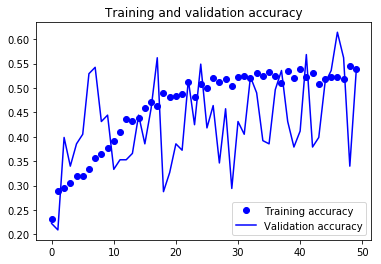

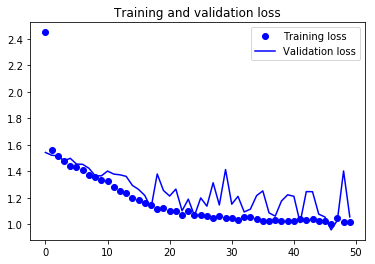

In [22]:
# Visualization
accuracy = emg_train.history['accuracy']
val_accuracy = emg_train.history['val_accuracy']
loss = emg_train.history['loss']
val_loss = emg_train.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()